# **Applying SARIMA Model for time series forecasting**

## **Preparations:**

**Imports:**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

import logging
import timeforecastinghandler

from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

**Read the DataFrames:**

In [4]:
hd161 = pd.read_csv('./Data/hd161.csv', index_col=0)
hd110 = pd.read_csv('./Data/hd110.csv', index_col=0)
hd37 = pd.read_csv('./Data/hd37.csv', index_col=0)
hd88 = pd.read_csv('./Data/hd88.csv', index_col=0)

locations = pd.read_excel('./Data/locations_fully_classified.xlsx', index_col=0)

**Enrich the DataFrameStorage class**

In [6]:
dataFrameStorage = timeforecastinghandler.DataFrameStorage(hd161, hd110, hd37, hd88, locations)

**Generate TimeForecasting class**

In [9]:
timeSeriesForecaster = timeforecastinghandler.TimeSeriesForecaster(locations, dataFrameStorage)

**Get the DataFrame for a certain location**

In [12]:
df = timeSeriesForecaster.format_dataFrame(0)

## **Splitting the data in Training and Testing Data**

**Setting up train and test DataFrame, based on given split values:**

In [18]:
train_df, test_df = timeSeriesForecaster.get_train_and_test_split(80, 20)

**Plotting the train and test data, based on train and test DataFrame:**

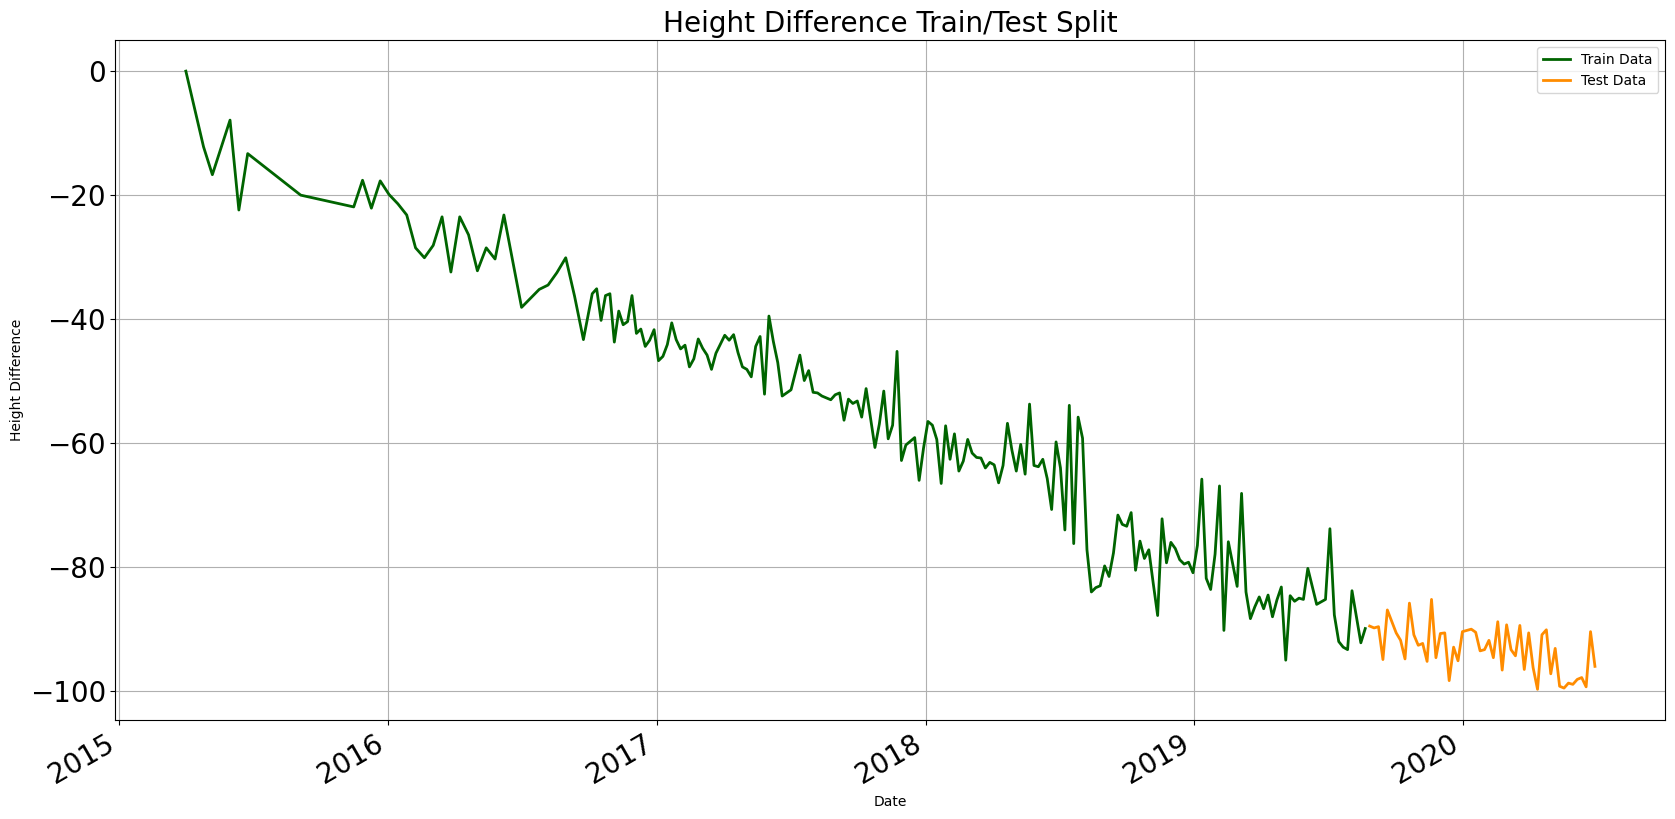

In [21]:
fig, _ = timeSeriesForecaster.plot_train_and_test_split(train_df, test_df)
fig.show()

## **Checking the sesonal influence with a decomposition of the data**

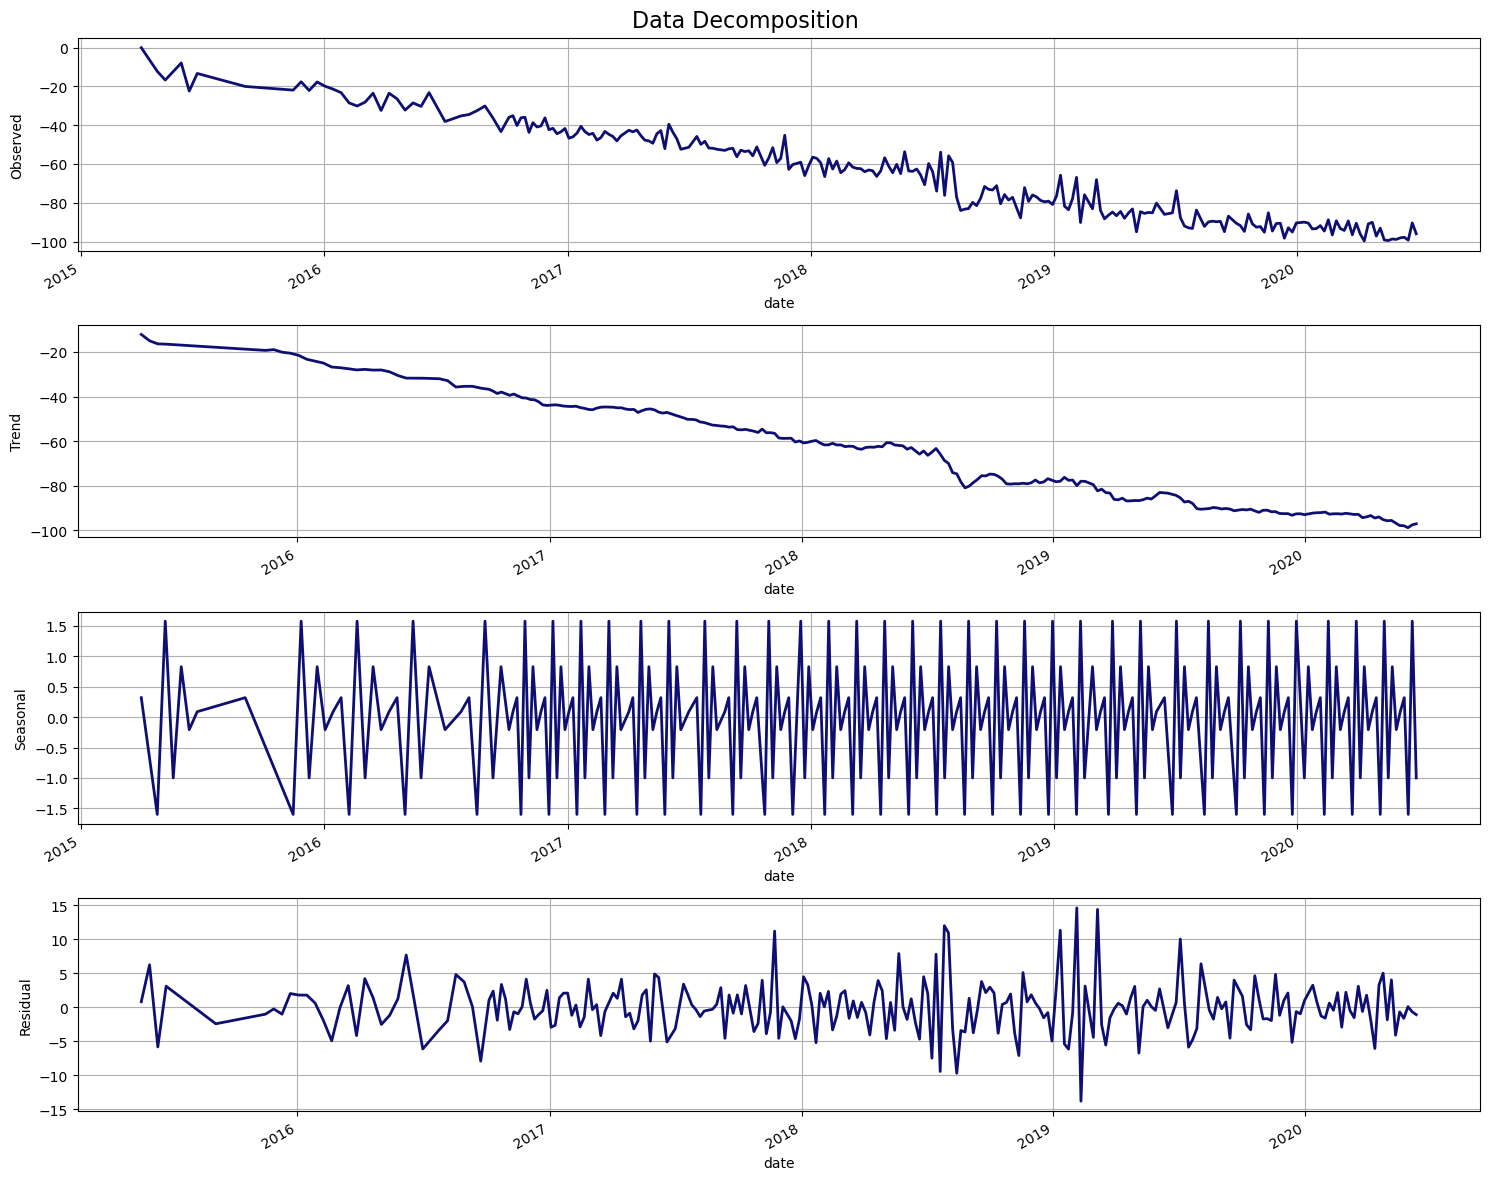

In [24]:
fig, _ = timeSeriesForecaster.plot_seasonal_decomposed_data(7)
fig.show()

The provided data has gaps of around six days in between in each observation, therefor we decided to
pass a period of seven to the decomposer. The period of seven represents a weekly period.

The Sesonal-Graph shows a clear pattern, starting at around 2017. Before that there seems to be not a clear pattern. This is caused by gaps in the early stages of the observation. However, based on the clear evidence, that there is a underlying seasonality in the data, it can be derived, that also the data points in the early stages were influnced by seasonality.

## **Finding the best possible seasonal and non-seasonal orders by applying a auto-ARIMA process**

In [29]:
steps_with_mse = timeSeriesForecaster.get_lag_by_minimizing_mse(29, 30)

For step: 29 | mse of: 48.98926086580965
For step: 30 | mse of: 15.235924325819699


In [30]:
step, best_mse = timeSeriesForecaster.get_best_lag_value(steps_with_mse)
pred_vals_of_best_model = timeSeriesForecaster.get_predicted_values_for_best_model(step)

The following model includes a lag of 30 and has a MSE of 15.24. This model does NOT include further external data.
The model order: (0, 1, 1) and seasonal-order: (1, 0, 0, 30)


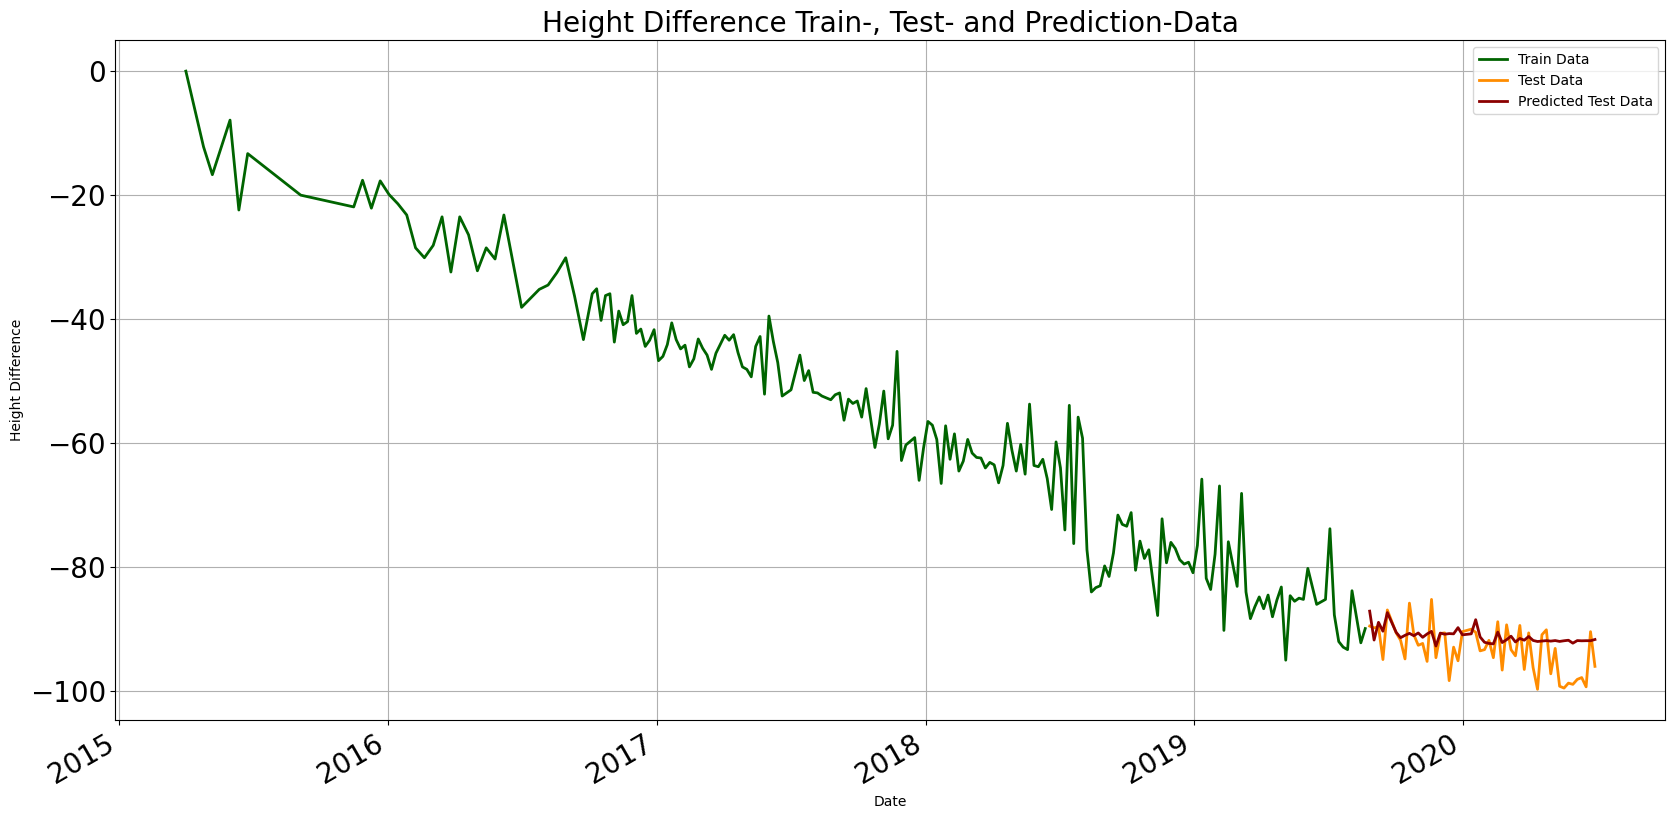

In [31]:
fig, _ = timeSeriesForecaster.plot(pred_vals_of_best_model)
fig.show()